In [3]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

In [4]:
keras.datasets.mnist.load_data()
(x_Train,y_Train),(x_Test,y_Test) =keras.datasets.mnist.load_data()

In [5]:
print('x_train_image:',x_Train.shape)
print('y_train_label:',y_Train.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [6]:
print('x_test_image:',x_Test.shape)
print('y_test_label:',y_Test.shape)

x_test_image: (10000, 28, 28)
y_test_label: (10000,)


In [7]:
def plot_image(image):               #定義函數名稱及參數
    fig=plt.gcf()                    #先框出空的圖
    fig.set_size_inches(5,5)         #設定該圖的大小
    plt.imshow(image, cmap='binary') #顯示該圖之設定，2元色彩(cmap=colormap)
    plt.show()                       #顯示圖片

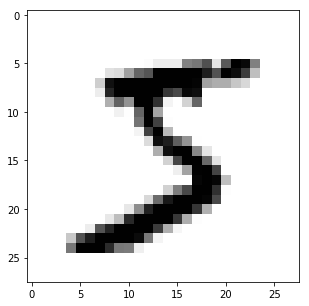

In [8]:
plot_image(x_Train[0])

In [9]:
y_Train[0]

5

In [10]:
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [11]:
x_Train4D_normalize=x_Train4D /255
x_Test4D_normalize=x_Test4D /255

In [12]:
y_TrainOneHot=np_utils.to_categorical(y_Train)
y_TestOneHot=np_utils.to_categorical(y_Test)

In [13]:
y_Train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [14]:
y_TrainOneHot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [15]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [16]:
model=Sequential()

In [17]:
model.add(Conv2D(filters=16, 
                kernel_size=(5,5), 
                padding='same',
                input_shape=(28,28,1),
                activation='relu'))

In [18]:
model.add(Conv2D(filters=36, 
                kernel_size=(5,5), 
                padding='same',
                activation='relu'))

In [19]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [20]:
# model.add(Dropout(0.25))

In [21]:
model.add(Flatten())

In [22]:
model.add(Dense(128, activation='relu'))

In [23]:
model.add(Dropout(0.5))

In [24]:
model.add(Dense(10,activation='softmax'))

In [25]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [27]:
train_history=model.fit(x=x_Train4D_normalize,
                       y=y_TrainOneHot,
                       validation_split=0.2,
                       epochs=20,
                       batch_size=300,
                       verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 3s - loss: 0.0166 - acc: 0.9942 - val_loss: 0.0361 - val_acc: 0.9917
Epoch 2/20
 - 3s - loss: 0.0160 - acc: 0.9942 - val_loss: 0.0325 - val_acc: 0.9920
Epoch 3/20
 - 3s - loss: 0.0143 - acc: 0.9953 - val_loss: 0.0332 - val_acc: 0.9929
Epoch 4/20
 - 3s - loss: 0.0152 - acc: 0.9950 - val_loss: 0.0343 - val_acc: 0.9920
Epoch 5/20
 - 3s - loss: 0.0144 - acc: 0.9950 - val_loss: 0.0366 - val_acc: 0.9923
Epoch 6/20
 - 3s - loss: 0.0137 - acc: 0.9955 - val_loss: 0.0357 - val_acc: 0.9925
Epoch 7/20
 - 3s - loss: 0.0135 - acc: 0.9955 - val_loss: 0.0389 - val_acc: 0.9922
Epoch 8/20
 - 3s - loss: 0.0115 - acc: 0.9960 - val_loss: 0.0336 - val_acc: 0.9925
Epoch 9/20
 - 3s - loss: 0.0114 - acc: 0.9960 - val_loss: 0.0361 - val_acc: 0.9924
Epoch 10/20
 - 3s - loss: 0.0114 - acc: 0.9958 - val_loss: 0.0344 - val_acc: 0.9926
Epoch 11/20
 - 3s - loss: 0.0101 - acc: 0.9966 - val_loss: 0.0378 - val_acc: 0.9924
Epoch 12/20
 - 3s - loss: 0.0122 - 

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 36)        14436     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 36)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 36)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7056)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               903296    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [34]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train_History')
    plt.ylabel(train)
    plt.xlabel('epochs')
    plt.legend(['train','validation'],loc='best')
    plt.show() 

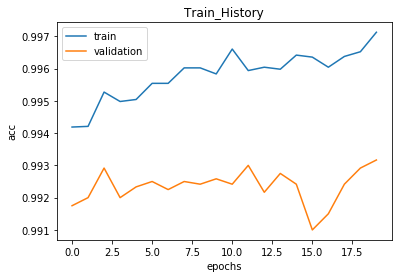

In [41]:
show_train_history(train_history,'acc','val_acc')